In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
boston=datasets.load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['price']=boston.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
np.unique(df['price'])

array([ 5. ,  5.6,  6.3,  7. ,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,
        8.7,  8.8,  9.5,  9.6,  9.7, 10.2, 10.4, 10.5, 10.8, 10.9, 11. ,
       11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.1, 12.3, 12.5, 12.6, 12.7,
       12.8, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9,
       19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. ,
       20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1,
       21.2, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 26

In [ ]:
input=boston.data
output=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input,output)

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR=DecisionTreeRegressor()

In [ ]:
DTR.fit(train_input,train_output)

DecisionTreeRegressor()

In [ ]:
DTR.score(test_input,test_output)

0.6938039958809123

In [ ]:
np.corrcoef(DTR.predict(test_input),test_output) #correlation coefficient

array([[1.        , 0.84294425],
       [0.84294425, 1.        ]])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(DTR.predict(test_input), test_output)
MSE

27.240787401574803

In [ ]:
NMSE=MSE/np.max(test_output) # np.mean(test_output) , np.max(test_output)-np.min(test_output)
NMSE

1.2263665366891179

[Text(0.5, 0.875, 'RM <= 6.941\nsquared_error = 82.85\nsamples = 379\nvalue = 22.64'),
 Text(0.25, 0.625, 'LSTAT <= 14.78\nsquared_error = 39.515\nsamples = 325\nvalue = 20.156'),
 Text(0.125, 0.375, 'DIS <= 1.434\nsquared_error = 26.136\nsamples = 203\nvalue = 23.325'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CRIM <= 5.782\nsquared_error = 17.272\nsamples = 122\nvalue = 14.884'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RM <= 7.424\nsquared_error = 83.005\nsamples = 54\nvalue = 37.591'),
 Text(0.625, 0.375, 'LSTAT <= 13.995\nsquared_error = 48.736\nsamples = 31\nvalue = 32.355'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'RM <= 8.742\nsquared_error = 42.44\nsamples = 23\nvalue = 44.648'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

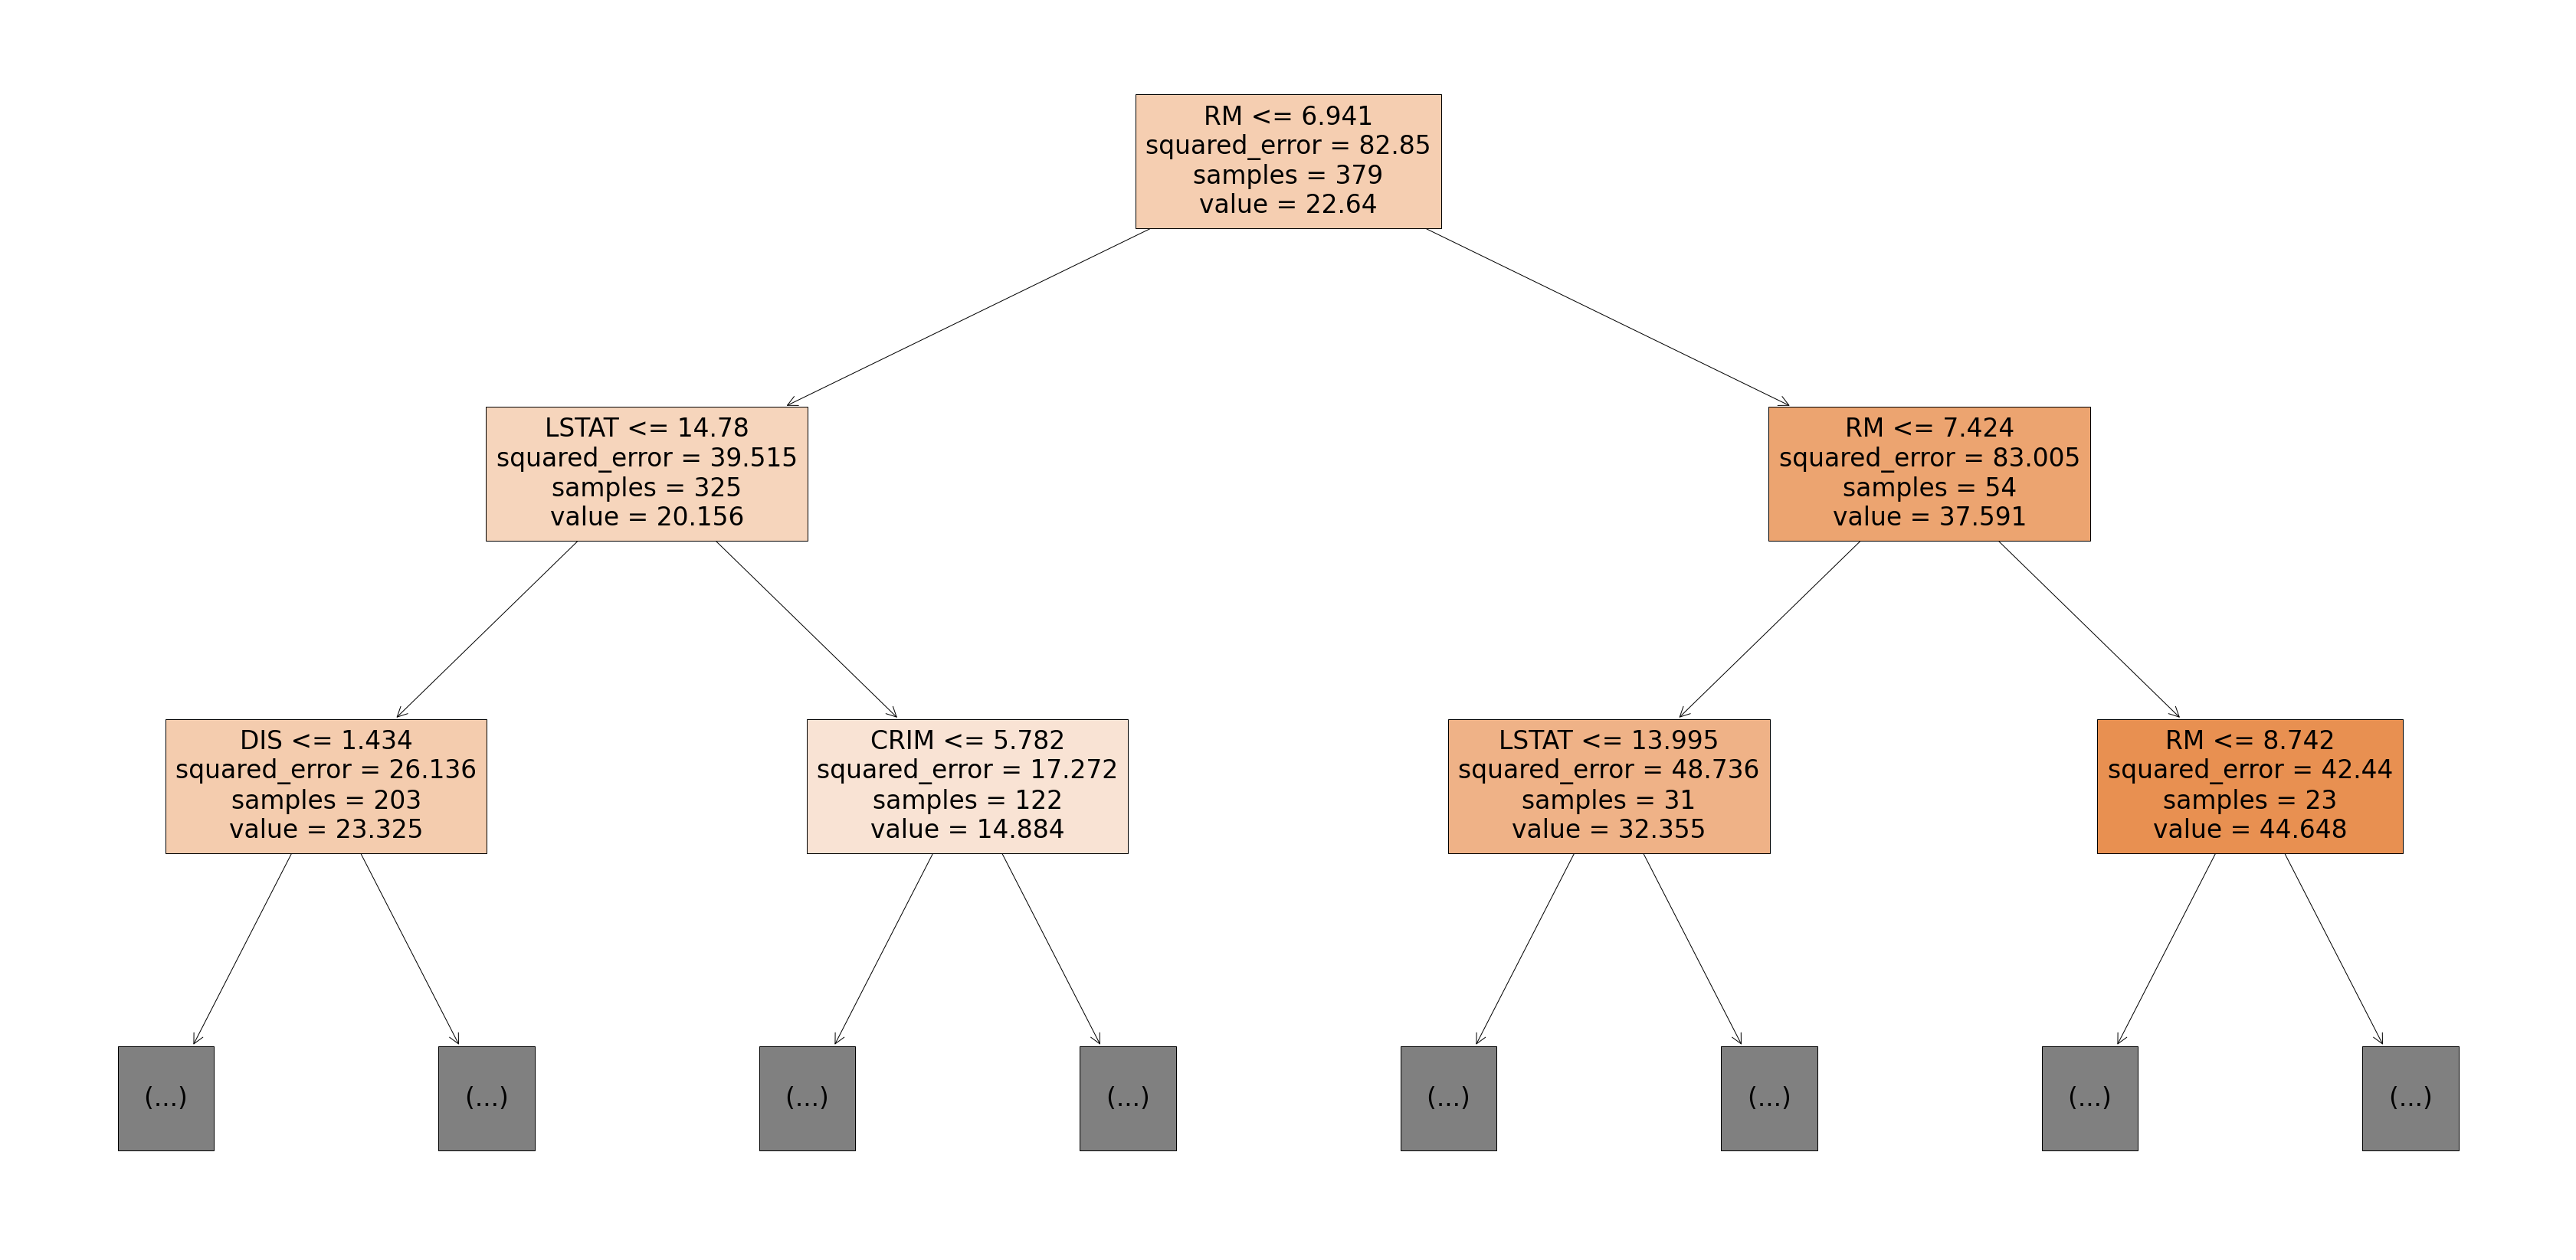

In [ ]:
plt.figure(figsize=(60,30))
plot_tree(DTR,max_depth=2, filled=True, feature_names=boston.feature_names)

In [ ]:
DTR.feature_importances_

array([0.03761503, 0.00109119, 0.00171569, 0.00107948, 0.01379151,
       0.59433992, 0.00929536, 0.0782254 , 0.00064583, 0.01912609,
       0.01474386, 0.01688199, 0.21144865])

In [ ]:
np.argmax(DTR.feature_importances_)

5

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')